# How to apply Linear Regression in R

See: https://datascienceplus.com/how-to-apply-linear-regression-in-r

```
Y = F(x) + ε

Y = β0 + β1 X + ε ( for simple regression )
Y = β0 + β1 X1 + β2 X2+ β3 X3 + …. + βp Xp + ε ( for multiple regression )
```

In [18]:
library(MASS)
library(ggplot2)
attach(Boston)
names(Boston)

The following objects are masked from train (pos = 3):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn

The following objects are masked from train (pos = 4):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn

The following objects are masked from train (pos = 5):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn

The following objects are masked from train (pos = 6):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn

The following objects are masked from train (pos = 7):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn

The following objects are masked from train (pos = 8):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn

The following objects are masked from Boston (pos = 9):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
 

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

In [19]:
##Sample the dataset. The return for this is row nos.
set.seed(1)
row.number <- sample(1:nrow(Boston), 0.8*nrow(Boston))
train = Boston[row.number,]
test = Boston[-row.number,]
dim(train)
dim(test)

[1] 404  14

[1] 102  14

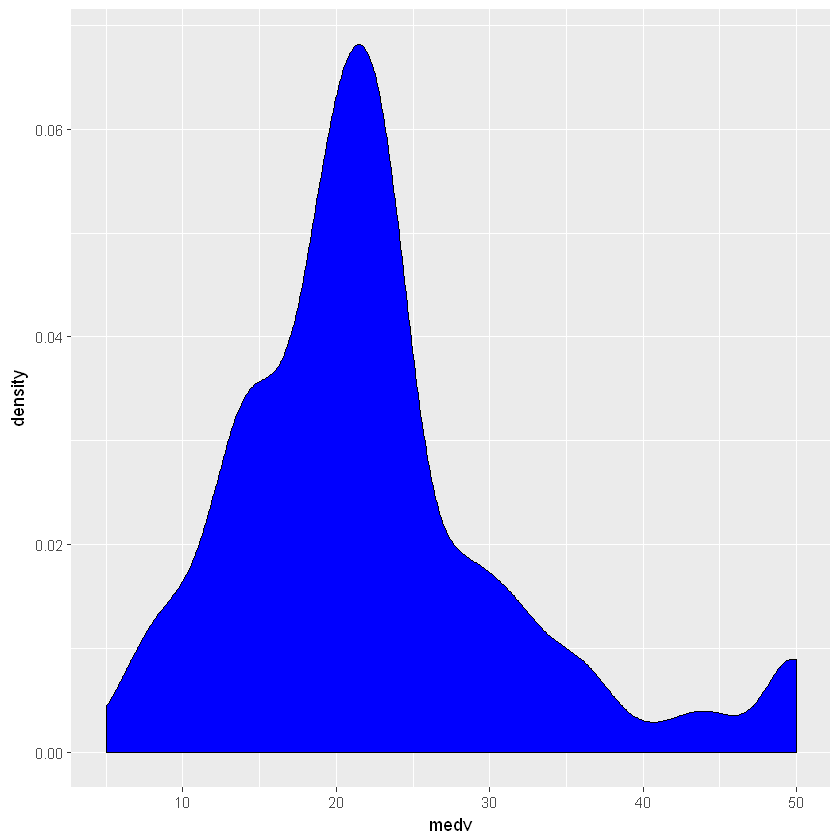

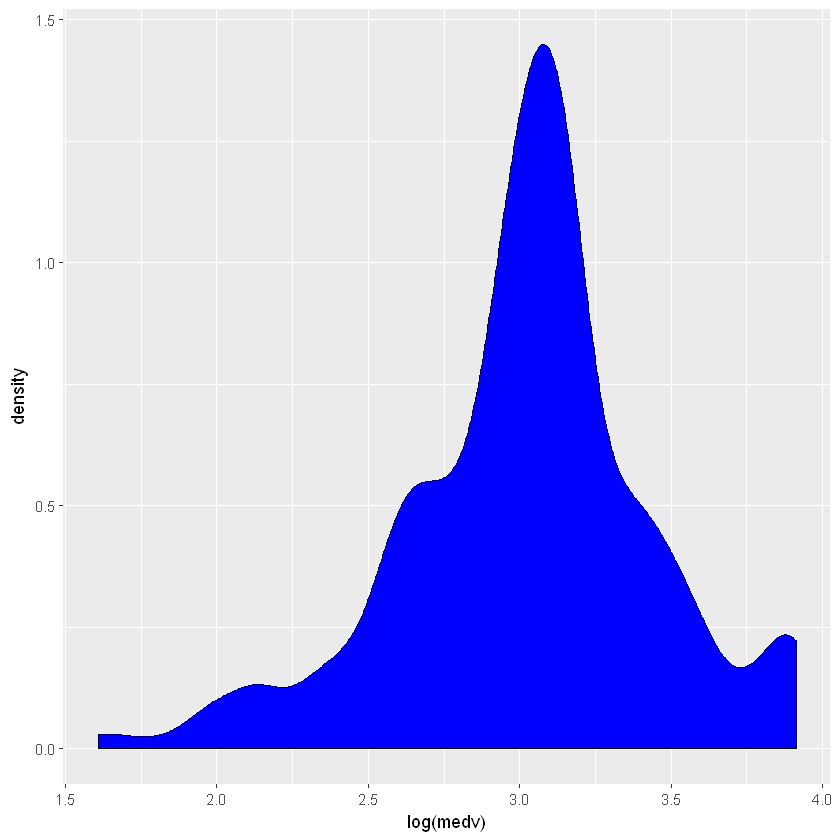

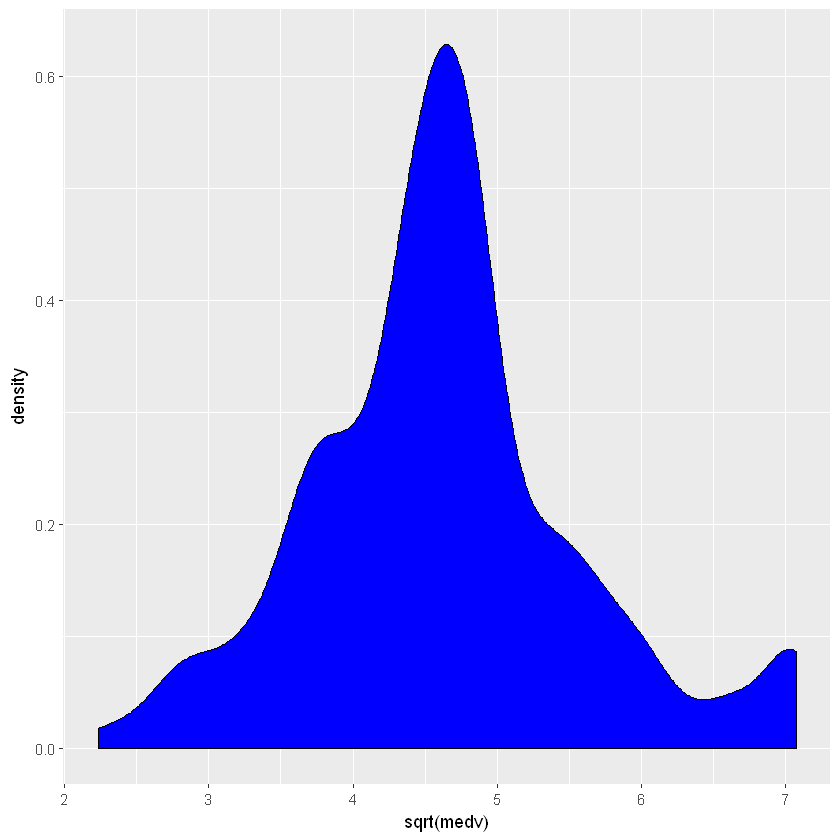

In [20]:
##Explore the data.
ggplot(train, aes(medv)) + geom_density(fill="blue")
ggplot(train, aes(log(medv))) + geom_density(fill="blue")
ggplot(train, aes(sqrt(medv))) + geom_density(fill="blue")


Call:
lm(formula = log(medv) ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.71392 -0.10435 -0.00913  0.10259  0.83290 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.5387176  0.2331496  19.467  < 2e-16 ***
crim        -0.0110546  0.0015143  -7.300 1.63e-12 ***
zn           0.0014176  0.0006281   2.257 0.024574 *  
indus        0.0020512  0.0028308   0.725 0.469120    
chas         0.0853159  0.0402646   2.119 0.034732 *  
nox         -0.9285807  0.1693534  -5.483 7.52e-08 ***
rm           0.0589055  0.0189839   3.103 0.002056 ** 
age          0.0002373  0.0006075   0.391 0.696247    
dis         -0.0598220  0.0091621  -6.529 2.06e-10 ***
rad          0.0152004  0.0030216   5.031 7.47e-07 ***
tax         -0.0005681  0.0001709  -3.325 0.000968 ***
ptratio     -0.0427382  0.0059698  -7.159 4.07e-12 ***
black        0.0003423  0.0001209   2.831 0.004885 ** 
lstat       -0.0319466  0.0022703 -14.071  < 2e-16 ***
---
Sig

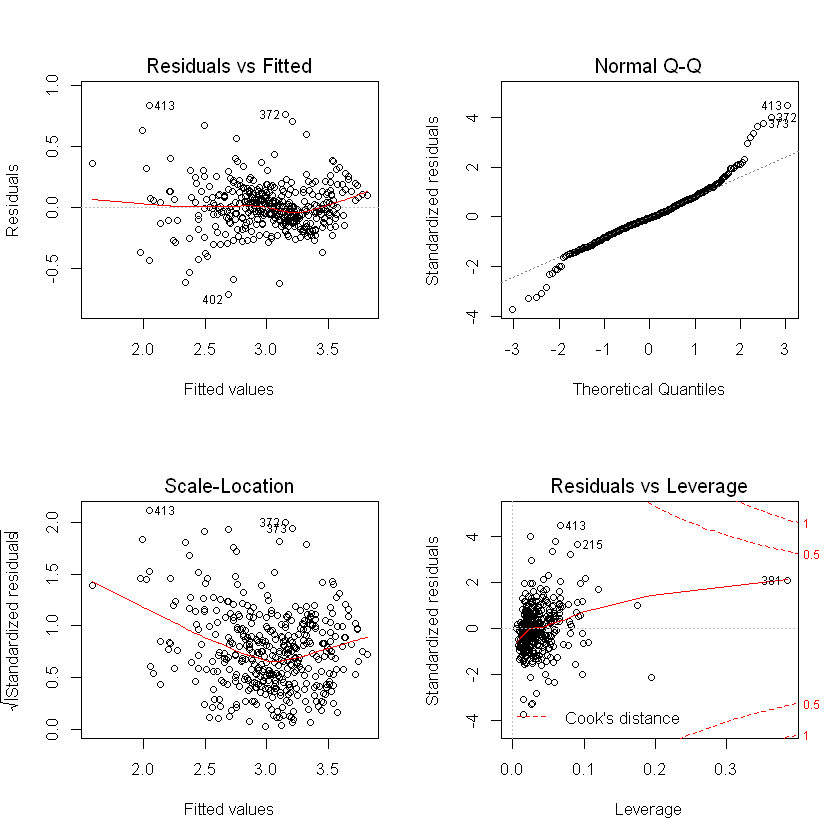

In [21]:
#Let’s make default model.
model1 = lm(log(medv)~., data=train)
summary(model1)
par(mfrow=c(2,2))
plot(model1)

In [22]:
# remove the less significant feature
model2 = update(model1, ~.-zn-indus-age) 
summary(model2)


Call:
lm(formula = log(medv) ~ crim + chas + nox + rm + dis + rad + 
    tax + ptratio + black + lstat, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.71008 -0.10962 -0.01296  0.10330  0.84030 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.5489757  0.2327067  19.548  < 2e-16 ***
crim        -0.0107965  0.0015120  -7.140 4.54e-12 ***
chas         0.0854786  0.0400433   2.135 0.033407 *  
nox         -0.9117698  0.1566753  -5.819 1.23e-08 ***
rm           0.0644686  0.0184026   3.503 0.000513 ***
dis         -0.0523327  0.0072616  -7.207 2.95e-12 ***
rad          0.0143808  0.0028974   4.963 1.03e-06 ***
tax         -0.0004624  0.0001505  -3.073 0.002263 ** 
ptratio     -0.0464620  0.0055623  -8.353 1.16e-15 ***
black        0.0003416  0.0001211   2.821 0.005026 ** 
lstat       -0.0314967  0.0021598 -14.583  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1935 on

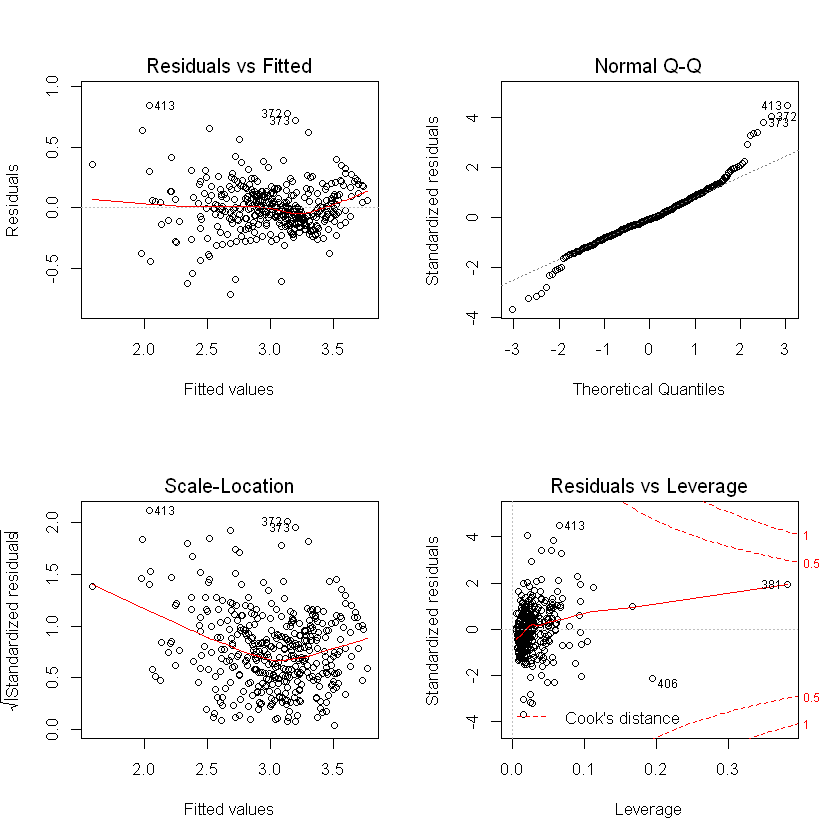

In [23]:
par(mfrow=c(2,2))
plot(model2)

In [24]:
# install.packages("ggExtra")

##Plot the residual plot with all predictors.
attach(train)
require(gridExtra)
plot1 = ggplot(train, aes(crim, residuals(model2))) + geom_point() + geom_smooth()
plot2=ggplot(train, aes(chas, residuals(model2))) + geom_point() + geom_smooth()
plot3=ggplot(train, aes(nox, residuals(model2))) + geom_point() + geom_smooth()
plot4=ggplot(train, aes(rm, residuals(model2))) + geom_point() + geom_smooth()
plot5=ggplot(train, aes(dis, residuals(model2))) + geom_point() + geom_smooth()
plot6=ggplot(train, aes(rad, residuals(model2))) + geom_point() + geom_smooth()
plot7=ggplot(train, aes(tax, residuals(model2))) + geom_point() + geom_smooth()
plot8=ggplot(train, aes(ptratio, residuals(model2))) + geom_point() + geom_smooth()
plot9=ggplot(train, aes(black, residuals(model2))) + geom_point() + geom_smooth()
plot10=ggplot(train, aes(lstat, residuals(model2))) + geom_point() + geom_smooth()
grid.arrange(plot1,plot2,plot3,plot4,plot5,plot6,plot7,plot8,plot9,plot10,ncol=5,nrow=2)

The following objects are masked from Boston (pos = 3):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn

The following objects are masked from train (pos = 4):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn

The following objects are masked from train (pos = 5):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn

The following objects are masked from train (pos = 6):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn

The following objects are masked from train (pos = 7):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn

The following objects are masked from train (pos = 8):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn

The following objects are masked from train (pos = 9):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
 

ERROR: Error in grid.arrange(plot1, plot2, plot3, plot4, plot5, plot6, plot7, : could not find function "grid.arrange"


In [10]:
#Lets  make default model and add square term in the model.
model3 = lm(log(medv)~crim+chas+nox+rm+dis+rad+tax+ptratio+
black+lstat+ I(crim^2)+ I(chas^2)+I(nox^2)+ I(rm^2)+ I(dis^2)+ 
I(rad^2)+ I(tax^2)+ I(ptratio^2)+ I(black^2)+ I(lstat^2), data=train)
summary(model3)


Call:
lm(formula = log(medv) ~ crim + chas + nox + rm + dis + rad + 
    tax + ptratio + black + lstat + I(crim^2) + I(chas^2) + I(nox^2) + 
    I(rm^2) + I(dis^2) + I(rad^2) + I(tax^2) + I(ptratio^2) + 
    I(black^2) + I(lstat^2), data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.74190 -0.08032 -0.00534  0.09105  0.75405 

Coefficients: (1 not defined because of singularities)
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8.266e+00  9.571e-01   8.636  < 2e-16 ***
crim         -2.754e-02  4.094e-03  -6.726 6.33e-11 ***
chas          7.821e-02  3.670e-02   2.131 0.033686 *  
nox          -1.723e+00  1.099e+00  -1.567 0.117826    
rm           -6.355e-01  1.406e-01  -4.518 8.31e-06 ***
dis          -1.267e-01  2.534e-02  -5.001 8.71e-07 ***
rad           2.150e-02  1.051e-02   2.046 0.041442 *  
tax          -1.140e-03  5.835e-04  -1.954 0.051428 .  
ptratio      -1.543e-01  7.778e-02  -1.984 0.047922 *  
black         1.622e-03  5.486e-

In [11]:
##Removing the insignificant variables.
model4=update(model3, ~.-nox-rad-tax-I(crim^2)-I(chas^2)-I(rad^2)-
I(tax^2)-I(ptratio^2)-I(black^2))
summary(model4)


Call:
lm(formula = log(medv) ~ crim + chas + rm + dis + ptratio + black + 
    lstat + I(nox^2) + I(rm^2) + I(dis^2) + I(lstat^2), data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.73918 -0.09787 -0.00723  0.08868  0.82585 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.6689322  0.4622249  14.428  < 2e-16 ***
crim        -0.0104797  0.0013390  -7.827 4.72e-14 ***
chas         0.0909580  0.0379316   2.398 0.016954 *  
rm          -0.7616673  0.1445966  -5.268 2.29e-07 ***
dis         -0.0918453  0.0239087  -3.842 0.000143 ***
ptratio     -0.0308017  0.0049005  -6.285 8.72e-10 ***
black        0.0002632  0.0001134   2.321 0.020824 *  
lstat       -0.0440988  0.0060377  -7.304 1.57e-12 ***
I(nox^2)    -0.6629324  0.1148901  -5.770 1.61e-08 ***
I(rm^2)      0.0654052  0.0113152   5.780 1.52e-08 ***
I(dis^2)     0.0045419  0.0020195   2.249 0.025063 *  
I(lstat^2)   0.0003587  0.0001657   2.165 0.030997 *  
---
Signif. codes:  

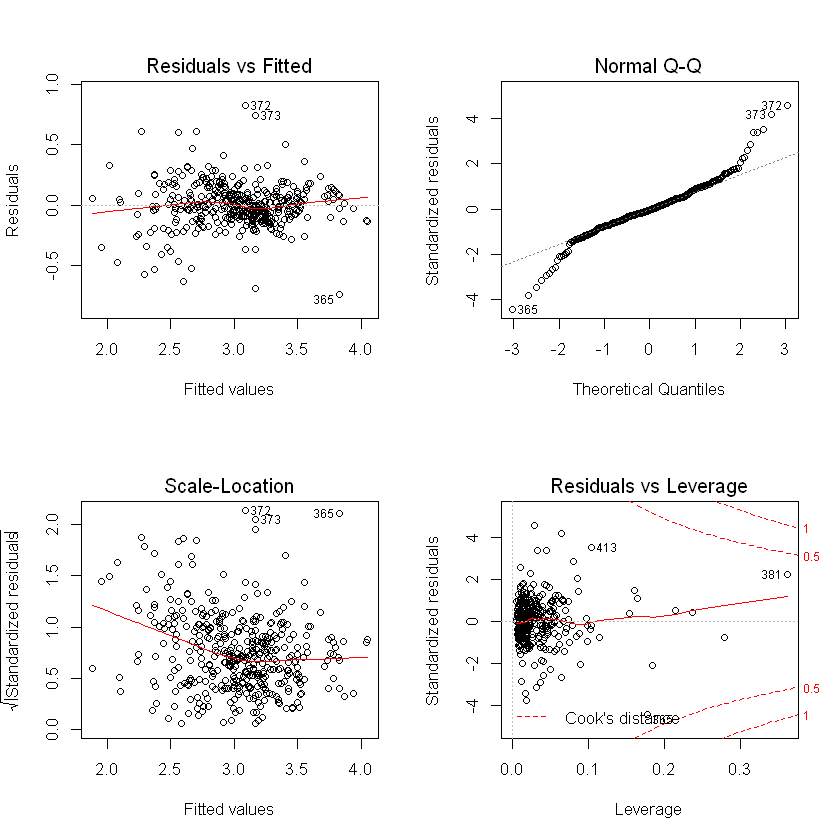

In [12]:
par(mfrow=c(2,2))
plot(model4)

In [13]:
pred1 <- predict(model4, newdata = test)
rmse <- sqrt(sum((exp(pred1) - test$medv)^2)/length(test$medv))
c(RMSE = rmse, R2=summary(model4)$r.squared)

RMSE        R2 
3.6825564 0.8122965

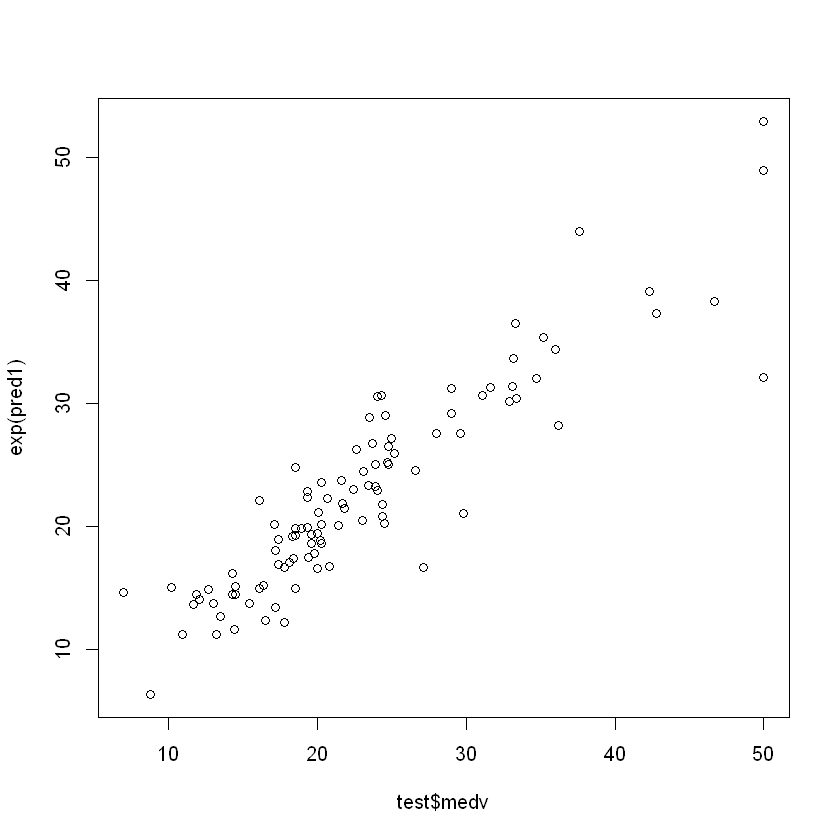

In [14]:
par(mfrow=c(1,1))
plot(test$medv, exp(pred1))